# Challenge "Alura Store Latam"

## Objetivo del análisis

El objetivo de este proyecto es analizar el desempeño de las cuatro tiendas de la cadena **Alura Store** con el fin de apoyar al Sr. Juan en la toma de decisión sobre **qué tienda debería vender** para iniciar un nuevo emprendimiento.

## Contexto y descripción

Durante este desafío se analizarán datos reales de ventas, rendimiento y reseñas de clientes correspondientes a las cuatro tiendas de Alura Store.

A partir de la información disponible, se evaluarán distintas métricas clave como:
- ingresos totales,
- categorías de productos más vendidas,
- productos con mayor volumen de ventas,
- calificaciones promedio de los clientes,
- costo promedio de envío.

El análisis se apoyará en el uso de la biblioteca **Pandas** para la manipulación de datos y **Matplotlib** para la creación de visualizaciones, con el objetivo de identificar la tienda menos eficiente y formular una recomendación final basada en datos.

## Alcance del proyecto

Este proyecto tiene un enfoque exploratorio y descriptivo. No busca predecir comportamientos futuros, sino comparar el desempeño histórico de cada tienda para identificar oportunidades y debilidades relativas entre ellas.

## Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [23]:
tienda.shape

(2359, 13)

In [24]:
tienda2.shape

(2359, 13)

In [25]:
tienda3.shape

(2359, 13)

In [26]:
tienda4.shape

(2358, 13)

**NOTA**: Aunque la Tienda 4 presenta una fila menos, la diferencia es marginal y no impacta los resultados

In [27]:
tienda4.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


**NOTA**: Se valida que los datasets tengan la misma estructura y no presenten valores nulos relevantes para el análisis.

##1. Análisis de facturación



Se genera una nueva columna "Tienda" a cada data frame para identificar la tienda a la que pertenece la data y se concatenan las 4 data frames en una total = all_tiendas

In [7]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

all_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

print("Dimensiones del DataFrame combinado:", all_tiendas.shape)
print("Muestra del DataFrame combinado:")
all_tiendas.sample(10)

Dimensiones del DataFrame combinado: (9435, 13)
Muestra del DataFrame combinado:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
1581,Pandereta,Instrumentos musicales,79800.0,4500.0,20/12/2022,Lucas Olivera,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 1
2650,Modelado predictivo,Libros,68300.0,1800.0,06/02/2020,Lucas Olivera,Cali,5,Tarjeta de crédito,3,3.43722,-76.52250,Tienda 2
1513,Sofá reclinable,Muebles,714200.0,36200.0,27/02/2023,Izabela de León,Bucaramanga,5,Tarjeta de crédito,1,7.12539,-73.11980,Tienda 1
3690,Mesa de comedor,Muebles,312500.0,16900.0,16/02/2021,Juliana Costa,Bogotá,4,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 2
3173,TV LED UHD 4K,Electrónicos,1960200.0,104800.0,18/10/2022,Izabela de León,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175,Tienda 2
3957,Kit de bancas,Muebles,263300.0,12200.0,06/03/2022,Ángel Rodriguez,Bogotá,5,Nequi,1,4.60971,-74.08175,Tienda 2
5514,Balón de voleibol,Deportes y diversión,58900.0,1300.0,26/05/2022,Rafael Acosta,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175,Tienda 3
6076,Estufa,Electrodomésticos,976600.0,50200.0,28/11/2020,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 3
2183,Celular ABXY,Electrónicos,1335600.0,71500.0,03/02/2022,Ángel Rodriguez,Riohacha,5,Nequi,1,11.54444,-72.90722,Tienda 1
5913,Smart TV,Electrónicos,1427400.0,74200.0,18/02/2021,Juliana Costa,Bogotá,1,Tarjeta de crédito,2,4.60971,-74.08175,Tienda 3


Se agrupa la data por la suma de precios de cada tienda = facturacion_x_tienda

In [8]:
facturacion_x_tienda = all_tiendas.groupby('Tienda')['Precio'].sum().reset_index()
print("Facturación por Tienda:\n", facturacion_x_tienda)

Facturación por Tienda:
      Tienda        Precio
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


Se genera un gráfico de barras para visualizar la facturación total de cada tienda.

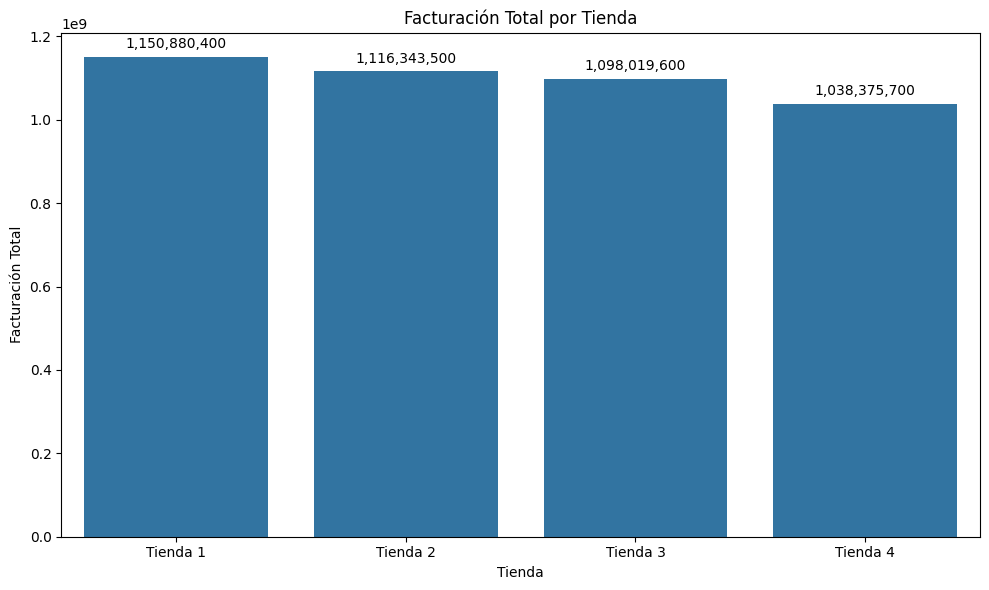

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tienda', y='Precio', data=facturacion_x_tienda)
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')
plt.xticks(rotation=0)

# Añadir etiquetas de valor en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

**NOTA**: La facturación representa el volumen de ventas, mas no la rentabilidad, ya que no se cuenta con información de costos operativos completos.

**Primer indicio fuerte:**
La Tienda 4 presenta la menor facturación total, lo que la posiciona como una candidata inicial para evaluación de venta. Sin embargo, este indicador por sí solo no es suficiente, ya que no considera volumen, satisfacción del cliente ni eficiencia operativa.

## 2. Ventas por categoría

Agrupar el DataFrame `all_tiendas` por 'Tienda' y 'Categoría del Producto' para contar la cantidad de productos vendidos en cada categoría para cada tienda. El resultado se almacenará en un nuevo DataFrame.


In [10]:
productos_por_categoria_tienda = all_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Productos')
print("Cantidad de Productos por Categoría y Tienda:")
print(productos_por_categoria_tienda.head())

Cantidad de Productos por Categoría y Tienda:
     Tienda   Categoría del Producto  Cantidad de Productos
0  Tienda 1  Artículos para el hogar                    171
1  Tienda 1     Deportes y diversión                    284
2  Tienda 1        Electrodomésticos                    312
3  Tienda 1             Electrónicos                    448
4  Tienda 1   Instrumentos musicales                    182


In [11]:
top_5_categorias_por_tienda = productos_por_categoria_tienda.groupby('Tienda').apply(lambda x: x.nlargest(5, 'Cantidad de Productos')).reset_index(drop=True)
print("Top 5 Categorías por Tienda:\n", top_5_categorias_por_tienda)

Top 5 Categorías por Tienda:
       Tienda Categoría del Producto  Cantidad de Productos
0   Tienda 1                Muebles                    465
1   Tienda 1           Electrónicos                    448
2   Tienda 1               Juguetes                    324
3   Tienda 1      Electrodomésticos                    312
4   Tienda 1   Deportes y diversión                    284
5   Tienda 2                Muebles                    442
6   Tienda 2           Electrónicos                    422
7   Tienda 2               Juguetes                    313
8   Tienda 2      Electrodomésticos                    305
9   Tienda 2   Deportes y diversión                    275
10  Tienda 3                Muebles                    499
11  Tienda 3           Electrónicos                    451
12  Tienda 3               Juguetes                    315
13  Tienda 3      Electrodomésticos                    278
14  Tienda 3   Deportes y diversión                    277
15  Tienda 4              

/tmp/ipython-input-1878728583.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_categorias_por_tienda = productos_por_categoria_tienda.groupby('Tienda').apply(lambda x: x.nlargest(5, 'Cantidad de Productos')).reset_index(drop=True)


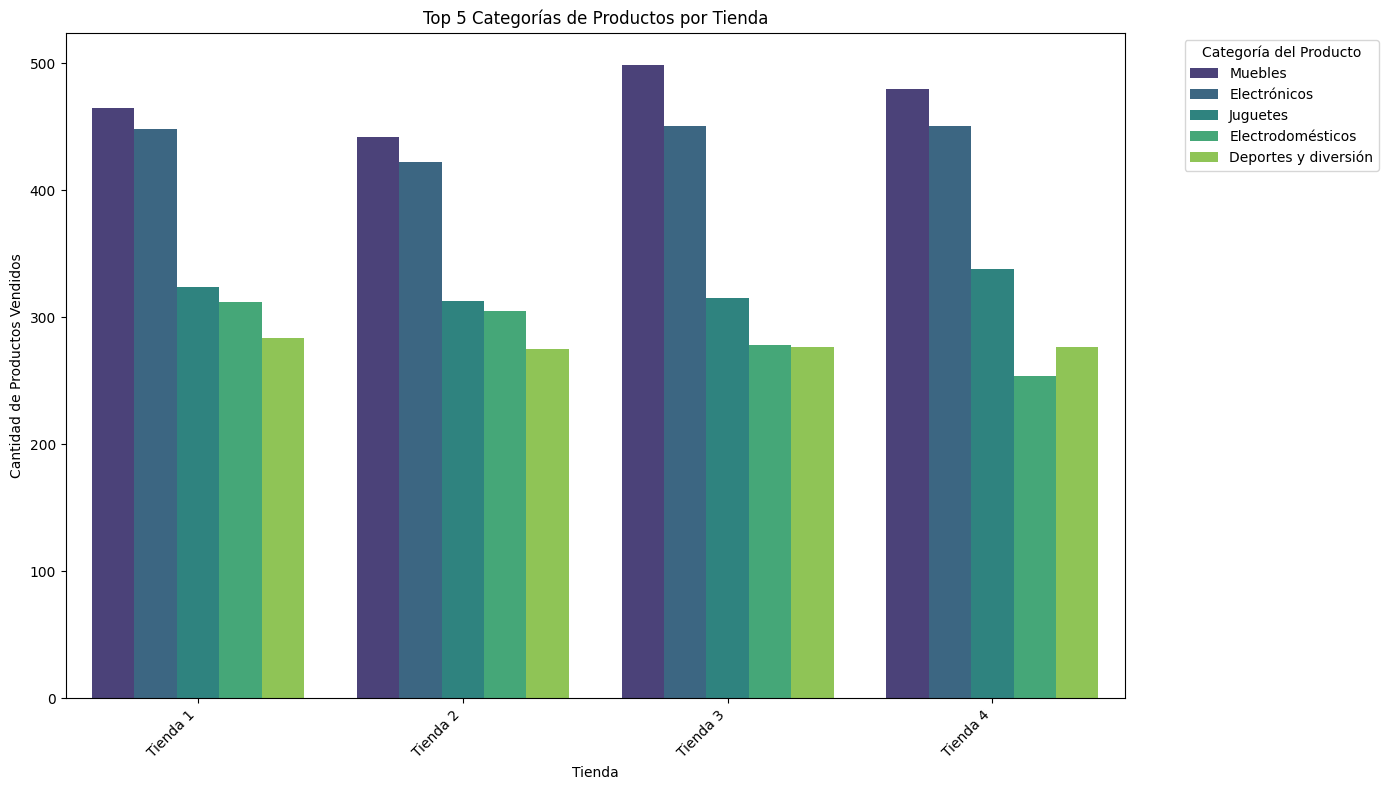

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='Tienda', y='Cantidad de Productos', hue='Categoría del Producto', data=top_5_categorias_por_tienda, palette='viridis')
plt.title('Top 5 Categorías de Productos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**NOTA**: Las cuatro tiendas presentan un comportamiento similar en cuanto a distribución de categorías, lo que sugiere que la menor facturación de la Tienda 4 no se debe a una falta de oferta, sino a un menor desempeño en volumen o eficiencia.

## 3. Calificación promedio de la tienda


In [13]:
calificacion_media_x_tienda = all_tiendas.groupby('Tienda')['Calificación'].mean().reset_index()
print('Calificación media por tienda:\n', calificacion_media_x_tienda)

Calificación media por tienda:
      Tienda  Calificación
0  Tienda 1      3.976685
1  Tienda 2      4.037304
2  Tienda 3      4.048326
3  Tienda 4      3.995759


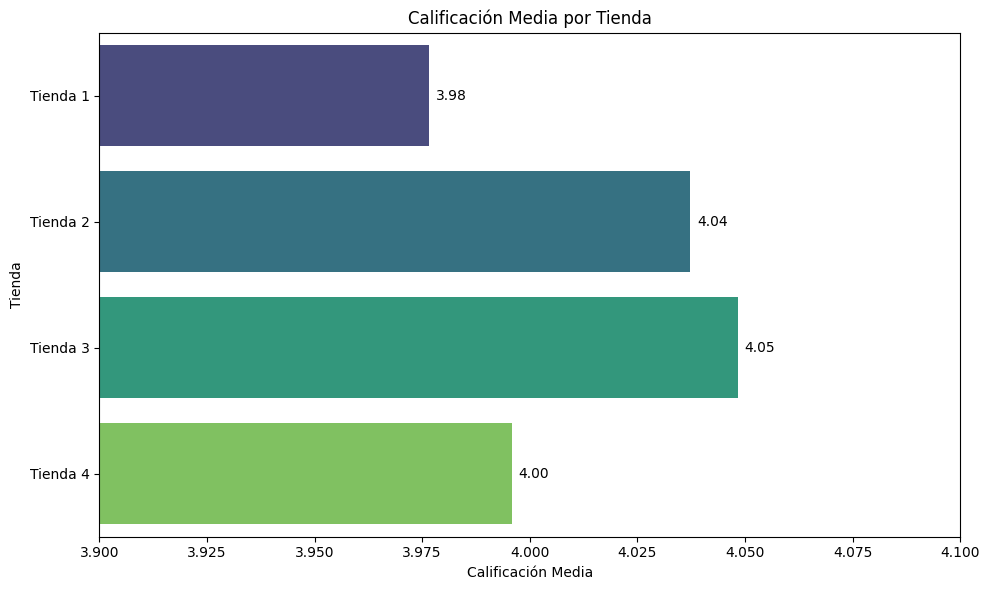

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Calificación', y='Tienda', data=calificacion_media_x_tienda, hue='Tienda', palette='viridis', legend=False)
plt.title('Calificación Media por Tienda')
plt.xlabel('Calificación Media')
plt.ylabel('Tienda')
plt.xlim(3.9, 4.1)

# Añadir etiquetas de valor en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.tight_layout()
plt.show()

**NOTA**: La calificación promedio de las cuatro tiendas es muy similar, situándose en torno a 4 puntos. Esto indica que la percepción de los clientes es consistente entre tiendas y que ninguna presenta problemas significativos de satisfacción o calidad de servicio.

En particular, la Tienda 4 mantiene una calificación comparable al resto, por lo que su menor facturación no puede atribuirse a una mala experiencia del cliente, sino probablemente a factores relacionados con volumen de ventas o eficiencia operativa.

## 4. Productos más y menos vendidos

/tmp/ipython-input-157980870.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.concat([x.head(1), x.tail(1)]))


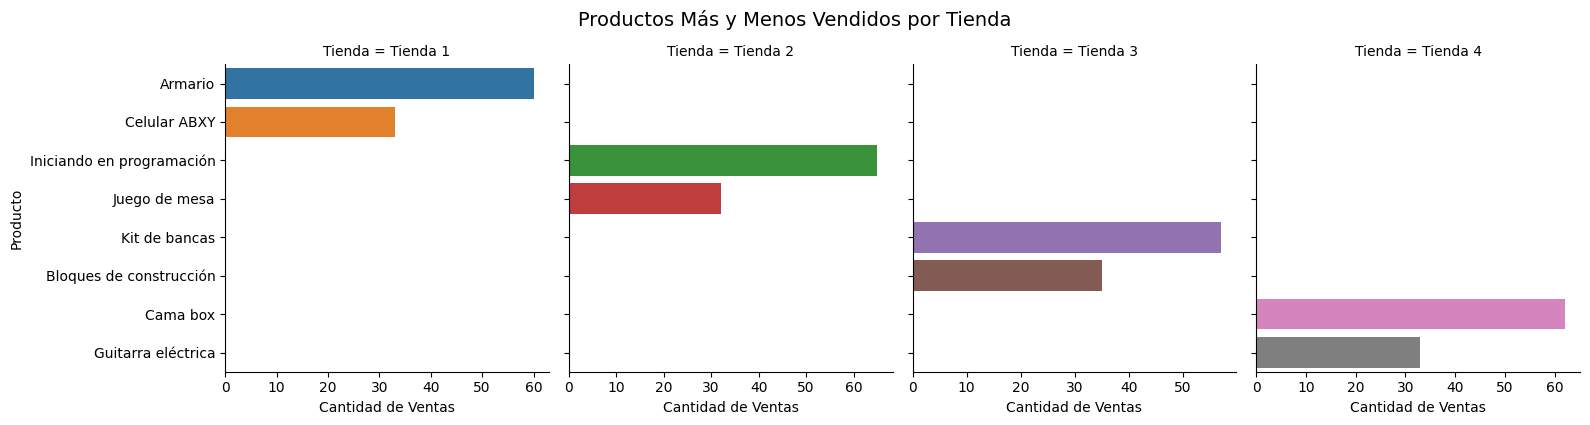

In [30]:
# Ventas por producto y tienda
ventas_producto_tienda = (
    all_tiendas
    .groupby(['Tienda', 'Producto'])
    .size()
    .reset_index(name='Cantidad de Ventas')
)

# Top 1 más y menos vendido por tienda
top_bottom = (
    ventas_producto_tienda
    .sort_values(['Tienda', 'Cantidad de Ventas'], ascending=[True, False])
    .groupby('Tienda')
    .apply(lambda x: pd.concat([x.head(1), x.tail(1)]))
    .reset_index(drop=True)
)

# Gráfico
sns.catplot(
    data=top_bottom,
    x='Cantidad de Ventas',
    y='Producto',
    hue='Producto',
    col='Tienda',
    kind='bar',
    sharex=False,
    height=4
)

plt.suptitle(
    'Productos Más y Menos Vendidos por Tienda',
    y=1.05,
    fontsize=14
)
plt.show()


**NOTA**: A partir del análisis de los productos más y menos vendidos, se observa que todas las tiendas presentan un comportamiento de ventas equilibrado, sin productos con ventas extremadamente bajas ni una dependencia excesiva de un solo producto. La diferencia entre el producto más vendido y el menos vendido es moderada, lo que indica un portafolio bien distribuido. Por ello, las diferencias de desempeño entre tiendas no parecen estar asociadas al mix de productos, sino a factores como el volumen total de ventas y la eficiencia operativa.

## 5. Costo de envío promedio por tienda

Costo de envío promedio por tienda:
      Tienda  Costo de envío
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


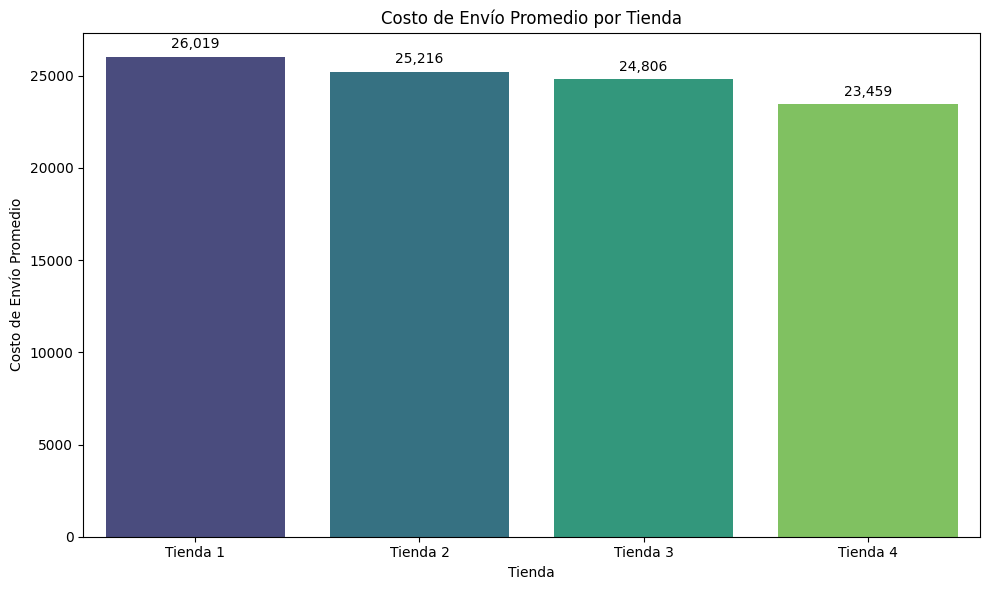

In [33]:
costo_envio_medio_x_tienda = all_tiendas.groupby('Tienda')['Costo de envío'].mean().reset_index()
print('Costo de envío promedio por tienda:\n', costo_envio_medio_x_tienda)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tienda', y='Costo de envío', data=costo_envio_medio_x_tienda, hue='Tienda', palette='viridis', legend=False)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.xticks(rotation=0)


# Añadir etiquetas de valor en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

**NOTA**: El gráfico muestra el costo de envío promedio para cada una de las cuatro tiendas. Se observa que la Tienda 4 presenta el menor costo de envío, mientras que la Tienda 1 tiene el valor más alto.

Sin embargo, las diferencias entre tiendas no son extremas, lo que sugiere que el costo de envío no es un factor determinante por sí solo en el desempeño de ventas. Dado que este costo es asumido directamente por el cliente, puede influir en la decisión de compra, especialmente en productos de menor valor, pero no explica completamente las diferencias observadas en la facturación entre tiendas.

Este resultado refuerza la idea de que el menor rendimiento de algunas tiendas está más relacionado con el volumen de ventas o la eficiencia general que con factores logísticos o de experiencia del cliente.

## 6. Conclusiones y recomendación final

### Introducción
El objetivo de este análisis fue apoyar al Sr. Juan en la toma de decisión sobre **qué tienda de la cadena Alura Store debería vender**, con el fin de iniciar un nuevo emprendimiento.
Para ello, se analizaron datos históricos de las cuatro tiendas, considerando métricas clave como **ingresos totales, categorías de productos, productos más y menos vendidos, calificaciones promedio de los clientes y costo de envío promedio.**
A partir de estos indicadores y de las visualizaciones generadas, se buscó identificar cuál de las tiendas presenta un **menor desempeño relativo**, sin comprometer la experiencia del cliente ni la estabilidad general del negocio.

### Desarrollo del análisis
1. **Ingresos totales por tienda:**
El análisis de facturación mostró diferencias claras entre las tiendas. Mientras algunas presentan mayores ingresos acumulados, una de ellas destaca por tener una facturación consistentemente más baja, lo que indica un menor volumen de ventas o una menor eficiencia comercial en comparación con el resto.

2. **Categorías de productos más y menos vendidas:**
Las tiendas comparten categorías similares dentro de su portafolio, aunque con variaciones en el desempeño por tienda. No se identificaron categorías críticas que expliquen por sí solas una caída significativa en ventas, lo que sugiere que el desempeño está más relacionado con el volumen general que con una mala elección de categorías.

3. **Calificación promedio de los clientes:**
Las calificaciones promedio son relativamente homogéneas entre las cuatro tiendas, lo que indica que no existen problemas relevantes de experiencia del cliente en ninguna de ellas. En particular, la tienda con menor facturación mantiene una calificación comparable al resto, descartando que su desempeño esté asociado a una mala percepción por parte de los clientes.

4. **Productos más y menos vendidos:**
Al analizar los productos más y menos vendidos por tienda, se observa que:

*   Cada tienda tiene productos distintos en los extremos de ventas.
*   La diferencia entre el producto más vendido y el menos vendido es moderada (aproximadamente una relación de 2 a 1).
*   No existen productos con ventas extremadamente bajas ni productos que concentren de forma desproporcionada el volumen total.

Esto sugiere un portafolio equilibrado, sin dependencias críticas de un solo producto.

5. **Costo de envío promedio por tienda:**
El costo de envío, que es asumido directamente por el cliente, presenta variaciones moderadas entre tiendas. La tienda con menor facturación no tiene el costo de envío más alto; por el contrario, se encuentra entre las más competitivas en este aspecto.
Por lo tanto, el costo de envío no parece ser un factor determinante en su menor desempeño comercial.

### **Conclusión y recomendación**
Con base en el análisis integral de los datos, se recomienda que el Sr. Juan venda la Tienda 4.

Esta recomendación se sustenta en los siguientes puntos clave:

* La Tienda 4 presenta los ingresos totales más bajos en comparación con las demás.

* No existen diferencias significativas en calificaciones de clientes, lo que indica que su menor desempeño no se debe a problemas de experiencia o servicio.

* Su portafolio de productos es equilibrado y comparable al de las otras tiendas.

* El costo de envío es competitivo, por lo que no representa una desventaja logística.

* Su menor rendimiento parece estar relacionado principalmente con menor volumen de ventas o eficiencia operativa, lo que la convierte en la opción más lógica para ser vendida sin afectar negativamente la percepción de la marca ni el funcionamiento general de la cadena.

En consecuencia, **vender la Tienda 4 permitiría al Sr. Juan liberar recursos para un nuevo emprendimiento**, manteniendo las tiendas con mejor desempeño y mayor potencial dentro de Alura Store.
